# Esercitazione 10
7 Maggio 2024

In [2]:
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl
import SolveTriangular
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))
import Schel_FULL as sf

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1 , \, -1.2, \, -0.88] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



9 9
9 9
8 8
rango= 2
rango= 3
rango= 4
rango= 5
rango= 2
rango= 3
rango= 4
rango= 5
rango= 2
rango= 3
rango= 4
rango= 5


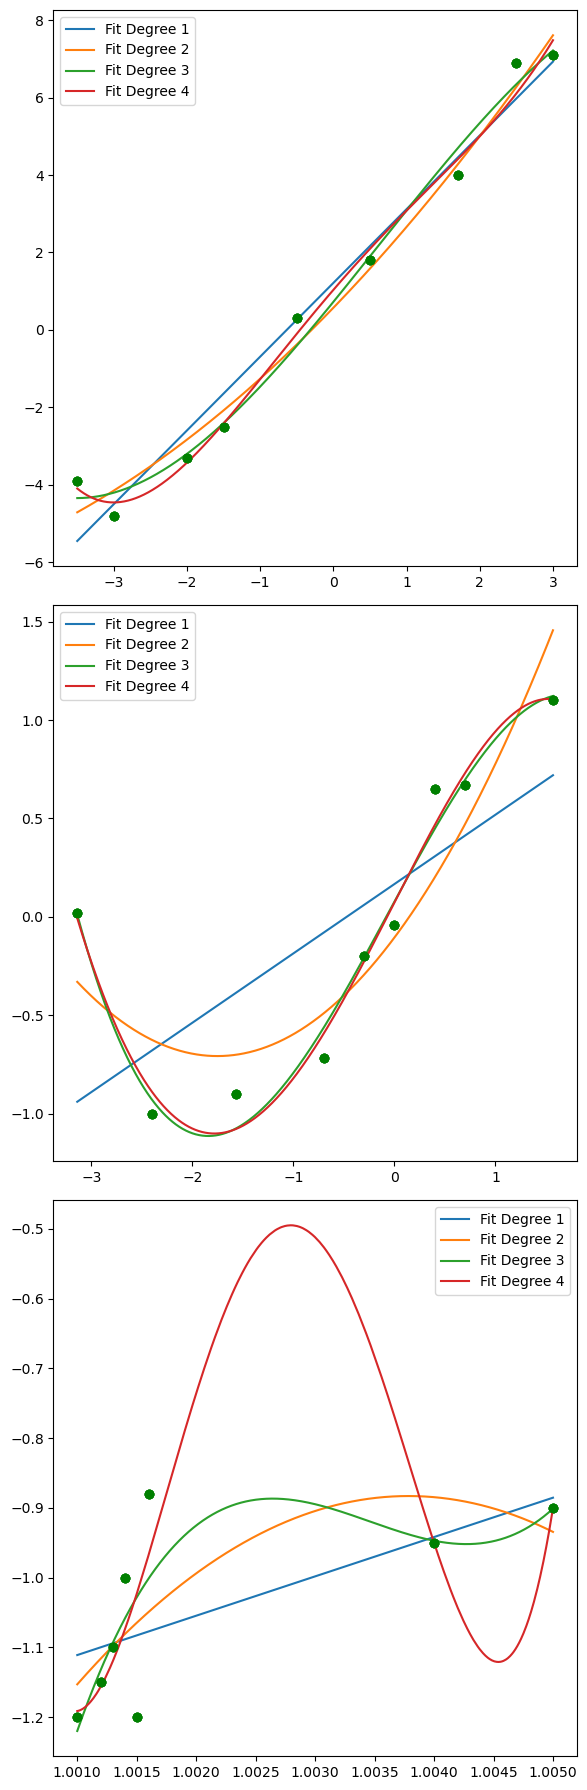

In [47]:
x1 = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3] )
y1 = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
x2 = np.array([-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57] )
y2 = np.array([0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1] )
x3 = np.array([1.001 ,1.004 ,1.005 ,1.0012,1.0013,  1.0014,  1.0015, 1.0016] )
y3 = np.array([-1.2, -0.95, -0.9, -1.15, -1.1, -1, -1.2, -0.88] )



xy = [[x1, y1], [x2, y2], [x3, y3]]

for couple in xy :
    print(couple[0].size, couple[1].size)

fig, ax = plt.subplots(3, 1, figsize=(6, 18))
for i in range(3):
    x  = xy[i][0]
    y = xy[i][1]
    for n in range(1, 5):
        m = x.shape[0]
        gradlib = n + 1
        V = np.vander(x, increasing=True)[:, 0:gradlib]
        Min = np.min(x)
        Max = np.max(x)
        xx = np.linspace(Min, Max, 1000)
        alpha_EQN, r = sf.SVDLS(V, y)
        pol_EQN = np.polyval(np.flip(alpha_EQN), xx)
        ax[i].plot(xx, pol_EQN, label=f'Fit Degree {n}')
        ax[i].plot(x, y, 'go')
    ax[i].legend()

plt.tight_layout()
plt.show()

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



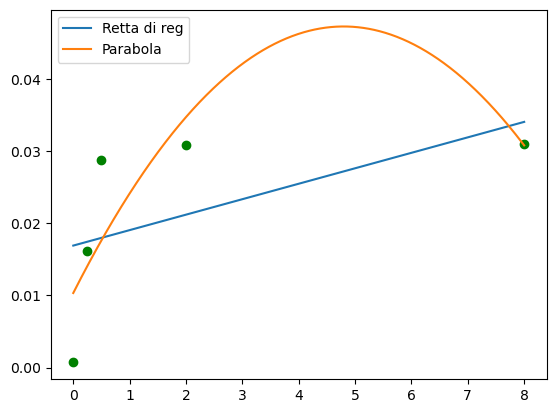

In [4]:
x = np.array([0.0004,  0.2507,  0.5008,  2.0007, 8.0013]  )
y = np.array([0.0007,  0.0162,  0.0288,  0.0309,  0.0310] )

n1 = 1
n2 = 2
gradlib1 = n1+1
gradlib2 = n2+1

V1 = np.vander(x, increasing=True)[:, :gradlib1]
V2 = np.vander(x, increasing=True)[:, :gradlib2]

xx = np.linspace(np.min(x), np.max(x), 1000)

alpha_EQN1 = sf.eqnorm(V1, y)
alpha_EQN2 = sf.eqnorm(V2, y)

yy1 = np.polyval(np.flip(alpha_EQN1), xx)
yy2 = np.polyval(np.flip(alpha_EQN2), xx)


plt.plot(xx, yy1, label='Retta di reg')
plt.plot(x,y, 'go')
plt.plot(xx, yy2, label = 'Parabola')
plt.legend()


## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



rango= 5


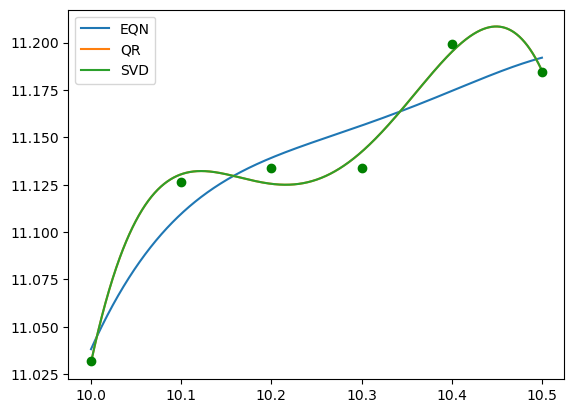

In [5]:
x = np.arange(10, 10.6, 0.1)
y = np.array([11.0320,  11.1263,  11.1339,  11.1339,  11.1993,  11.1844])

n = 4
gradlib = n+1

V = np.vander(x, increasing=True)[:, :gradlib]

xx = np.linspace(np.min(x), np.max(x), 1000)

alpha_EQN = sf.eqnorm(V, y)
alpha_QR, res_QR = sf.qrLS(V, y)
alpha_SVD, res_SVD = sf.SVDLS(V, y)

yy_EQN = np.polyval(np.flip(alpha_EQN), xx)
yy_QR = np.polyval(np.flip(alpha_QR), xx)
yy_SVD = np.polyval(np.flip(alpha_SVD), xx)

plt.plot(xx, yy_EQN,label = 'EQN')
plt.plot(xx, yy_QR, label = 'QR')
plt.plot(xx, yy_SVD, label = 'SVD')
plt.plot(x,y, 'go')
plt.legend()
plt.show()

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

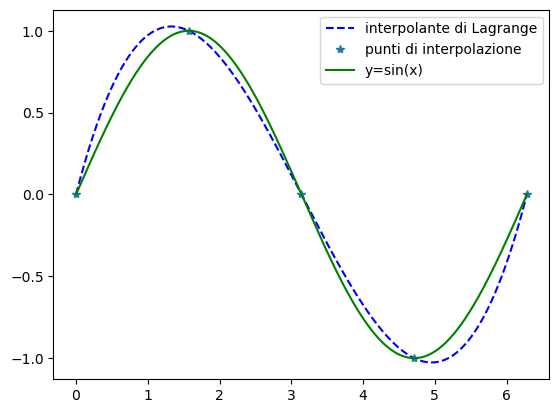

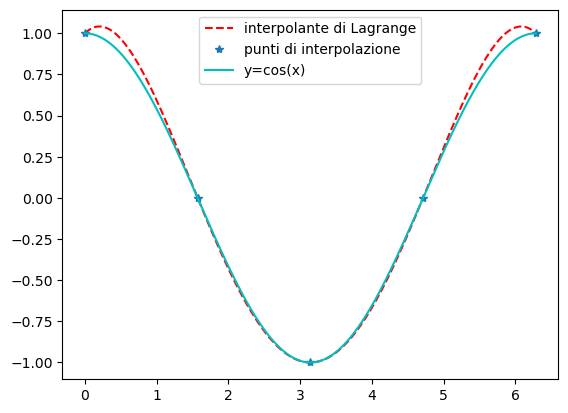

In [12]:
x = np.arange(0, 2*np.pi + np.pi/2, np.pi/2 )
xx = np.linspace(0, 2*np.pi , 1000)
y1 = np.sin(x)
y2 = np.cos(x)

yy1 = sf.InterpL(x, y1, xx)
yy2 = sf.InterpL(x, y2, xx)

plt.plot(xx,yy1,'b--',x,y1,'*',xx,np.sin(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)']);
plt.show()

plt.plot(xx,yy2,'r--',x,y2,'*',xx,np.cos(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)']);
plt.show()

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

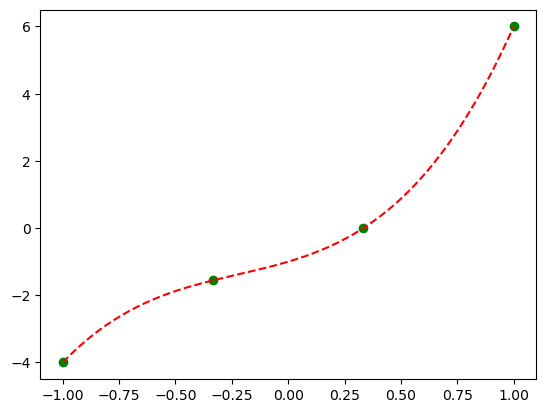

In [15]:
x = np.linspace(-1, 1,  4)
xx = np.linspace(np.min(x), np.max(x), 1000)
f = lambda x: 3*x**3 +2*x**2 +2*x-1
y = f(x)
yy = sf.InterpL(x,y, xx)

plt.plot(x, y, 'go')
plt.plot(xx, yy, 'r--')


## Esercizio 3
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ 
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


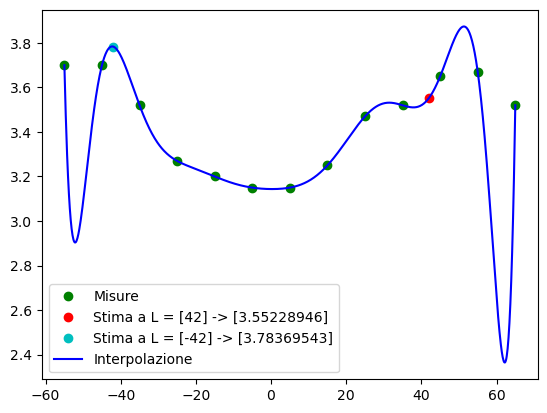

In [33]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

xx = np.linspace(np.min(L), np.max(L), 1000)

ptx1 = np.array([42])
ptx2 = np.array([-42])
yy = sf.InterpL(L, T, xx)
pty1 = sf.InterpL(L, T, ptx1)
pty2 = sf.InterpL(L, T, ptx2)

plt.plot(L,T, 'go')
plt.plot(ptx1,pty1, 'ro')
plt.plot(ptx2,pty2, 'co')
plt.plot(xx, yy, 'b-')

plt.legend(['Misure', f'Stima a L = {ptx1} -> {pty1}',f'Stima a L = {ptx2} -> {pty2}', 'Interpolazione' ])

## Esercizio 4

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).


n = 3, errore_eq = 0.7069887802477249, errore_cheb = 0.7502753111773612
n = 4, errore_eq = 0.4383497951290458, errore_cheb = 0.40201457281998176
n = 5, errore_eq = 0.4326689924794599, errore_cheb = 0.555887387371419
n = 6, errore_eq = 0.6169259580931773, errore_cheb = 0.2642251069849941
n = 7, errore_eq = 0.24733818290101173, errore_cheb = 0.39171791129191946
n = 8, errore_eq = 1.0451705181610227, errore_cheb = 0.17083003601575286
n = 9, errore_eq = 0.30028454351763817, errore_cheb = 0.26915810714735533
n = 10, errore_eq = 1.9156331475033668, errore_cheb = 0.10915351076845337
n = 11, errore_eq = 0.556728757005213, errore_cheb = 0.18274051951100267
n = 12, errore_eq = 3.6629347001421717, errore_cheb = 0.06920895624354317
n = 13, errore_eq = 1.0700529204778286, errore_cheb = 0.12338246423032351
n = 14, errore_eq = 7.1923242882971525, errore_cheb = 0.04660097519484446


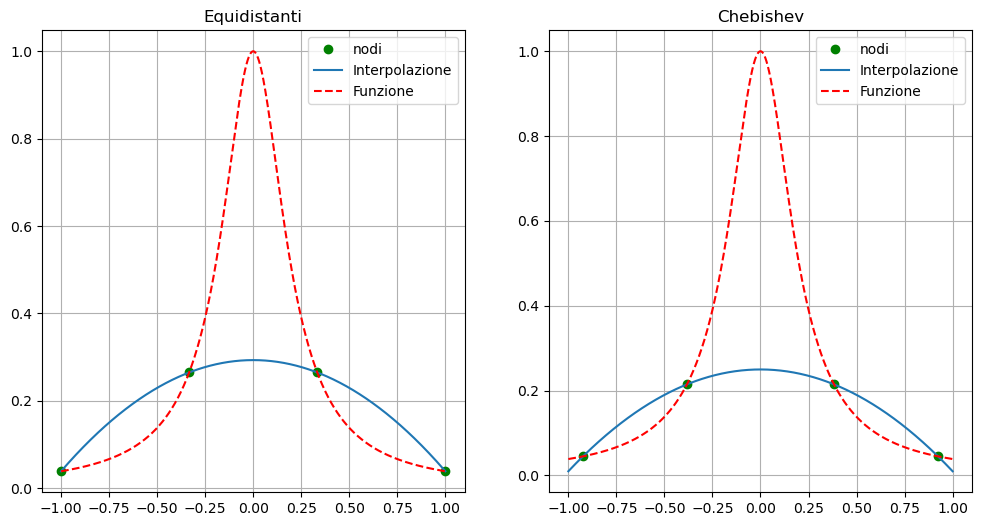

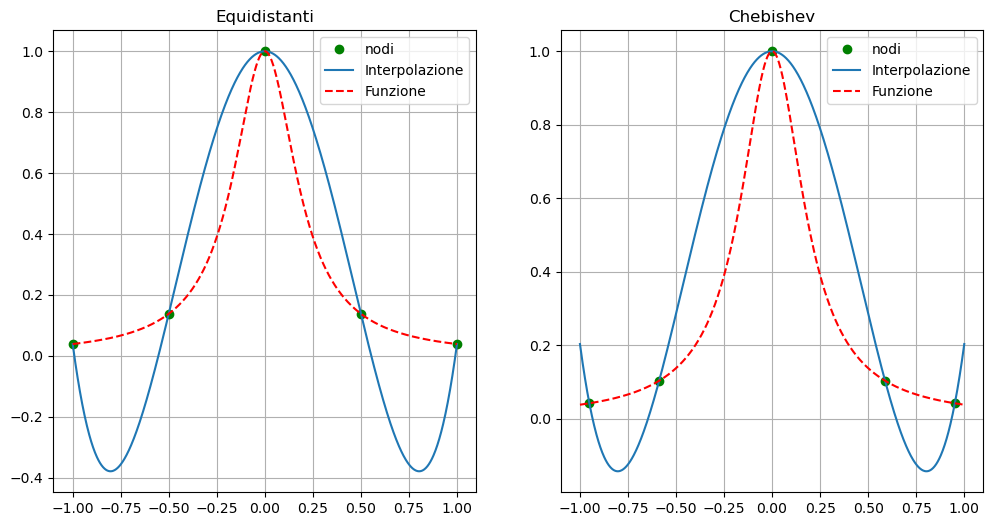

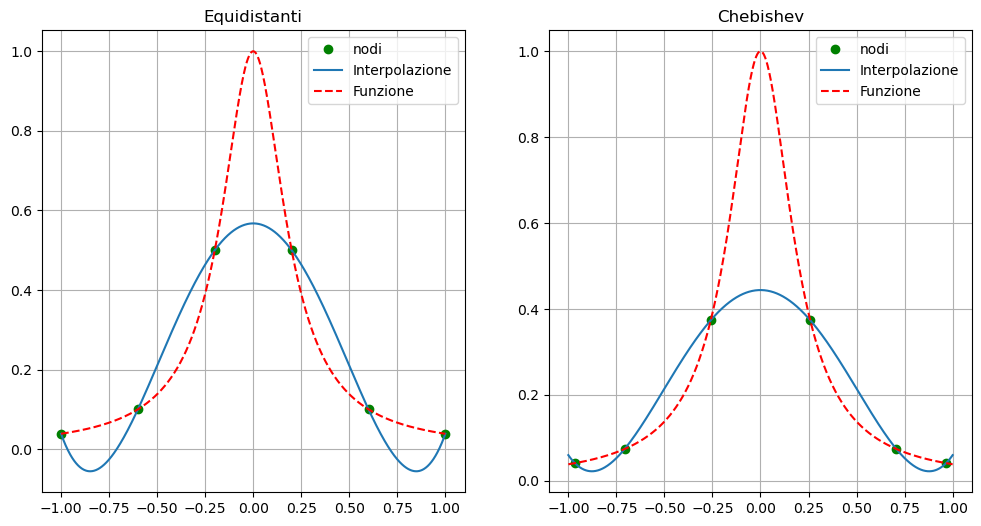

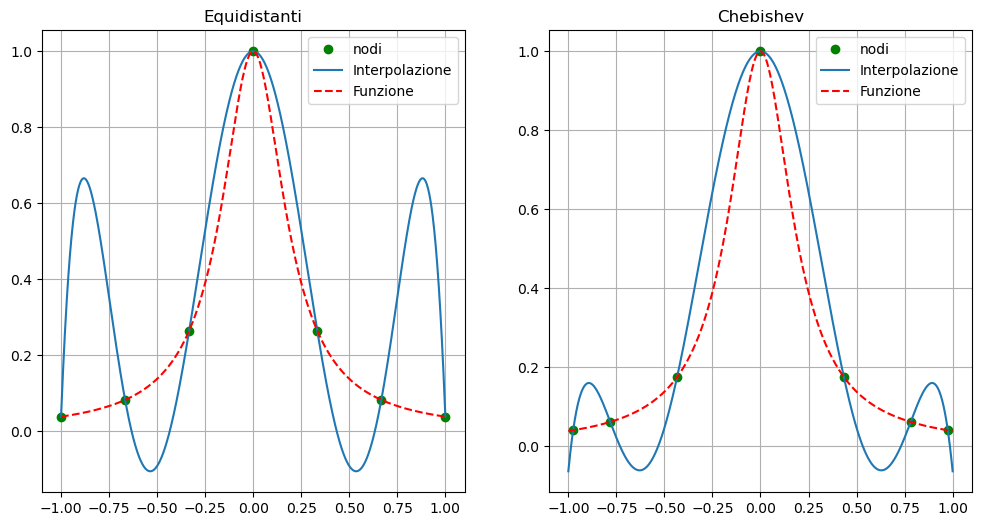

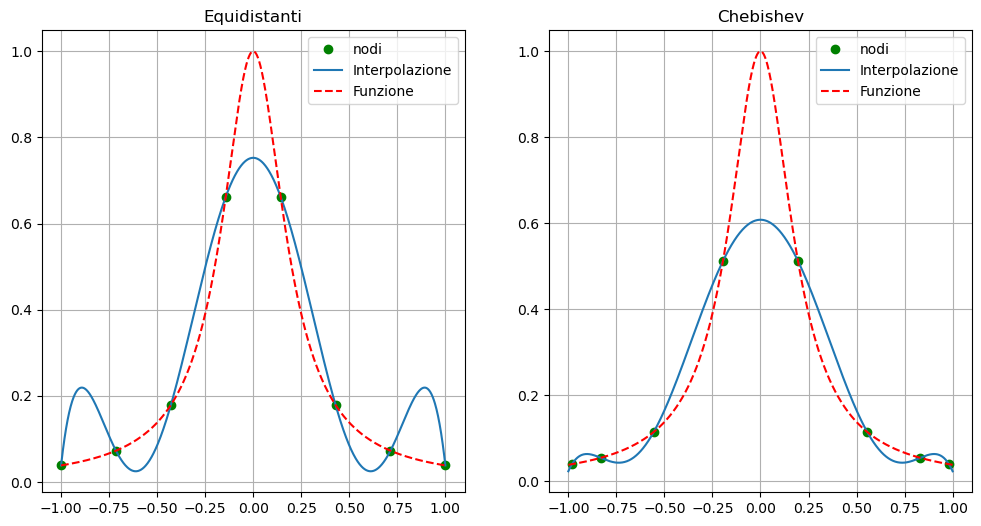

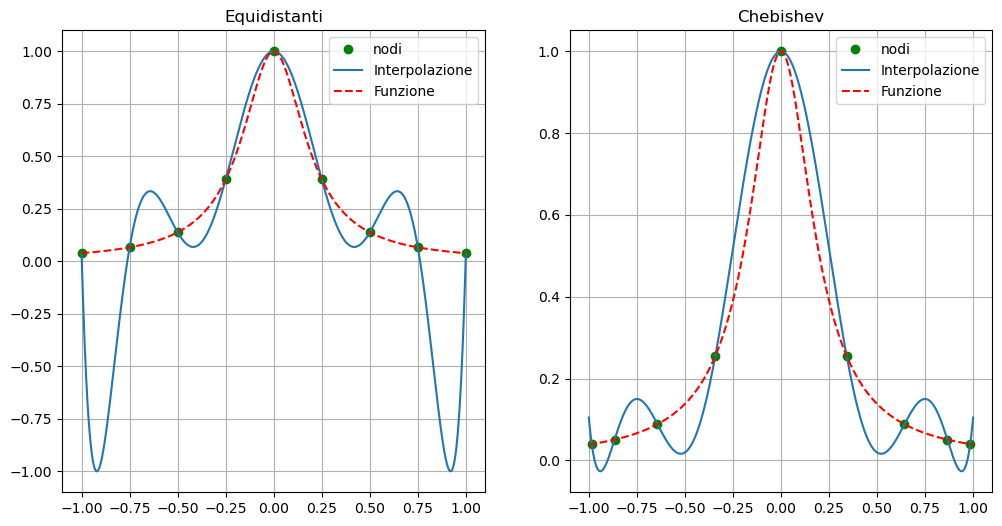

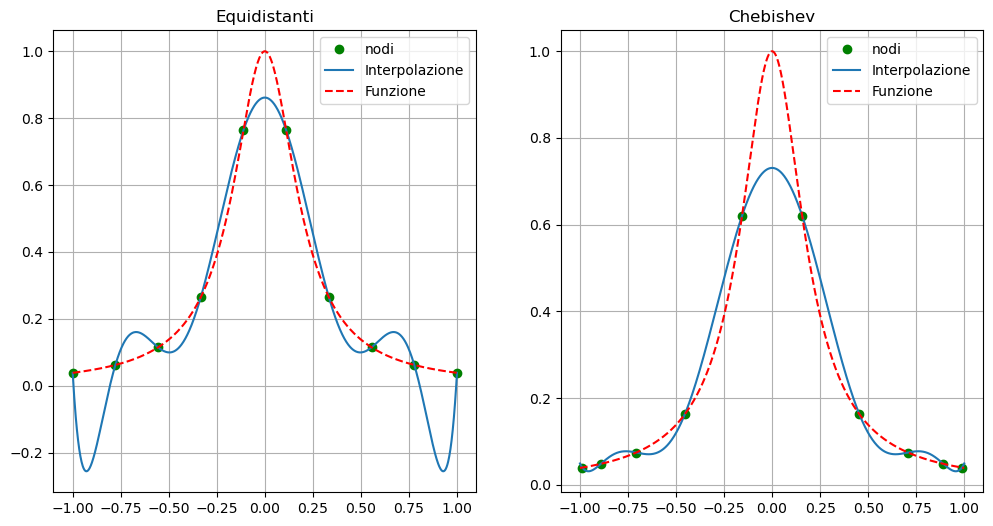

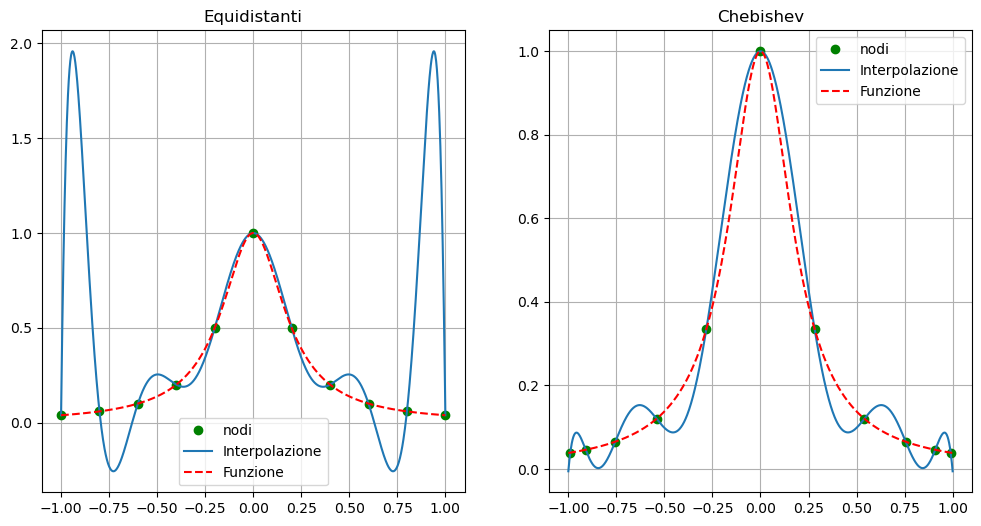

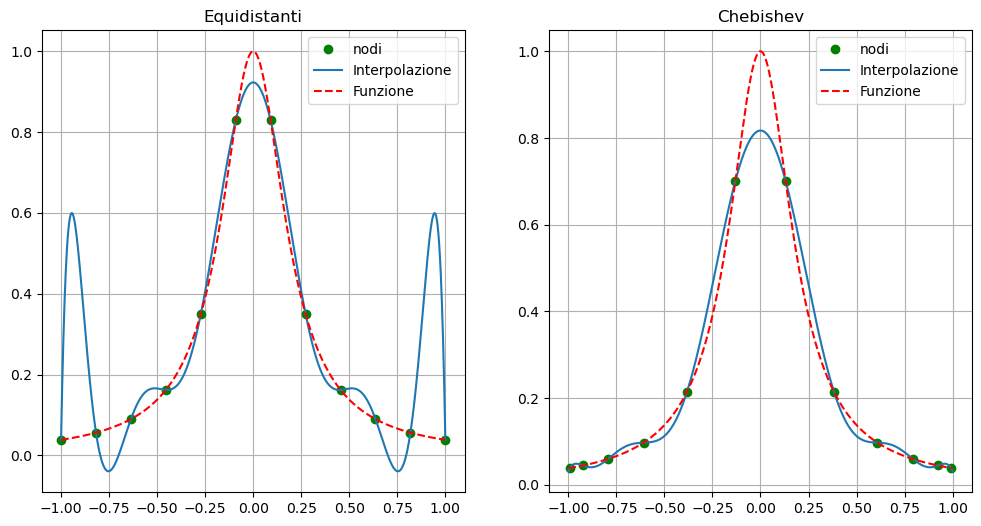

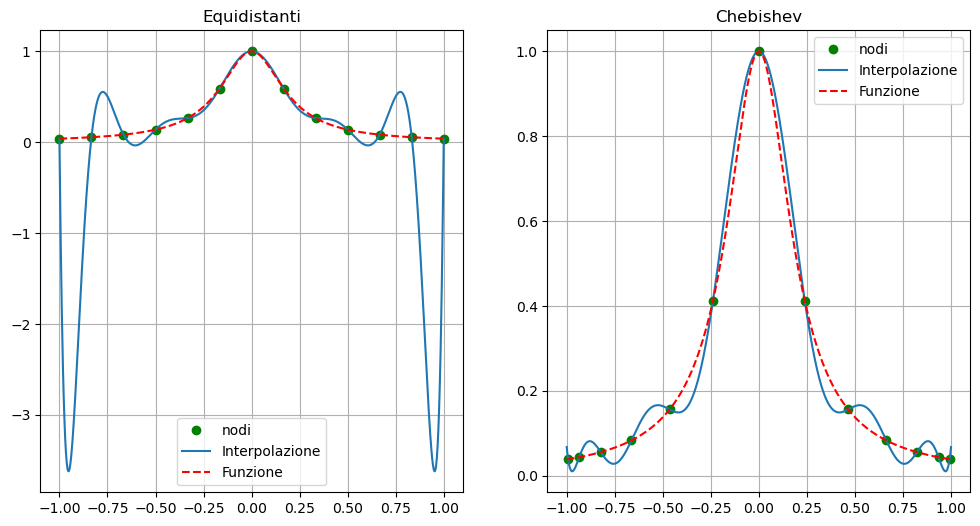

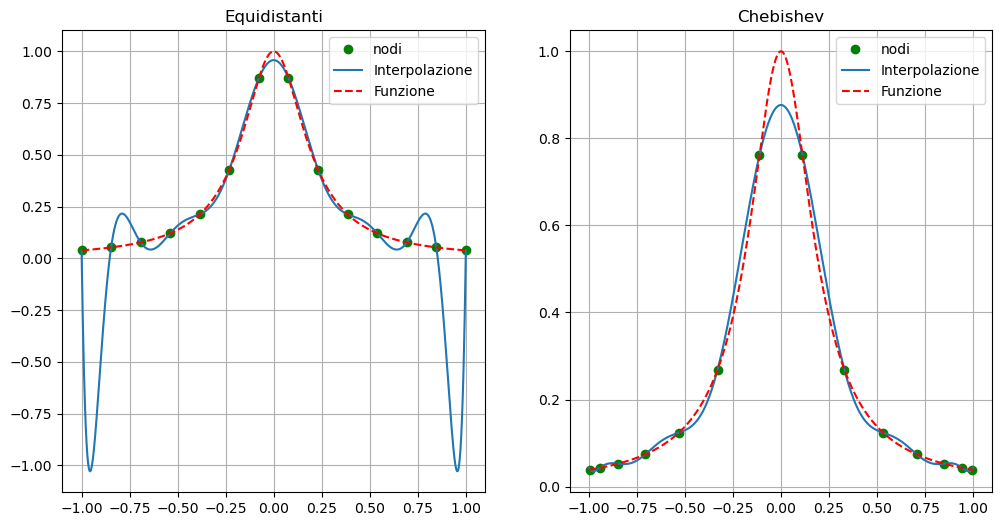

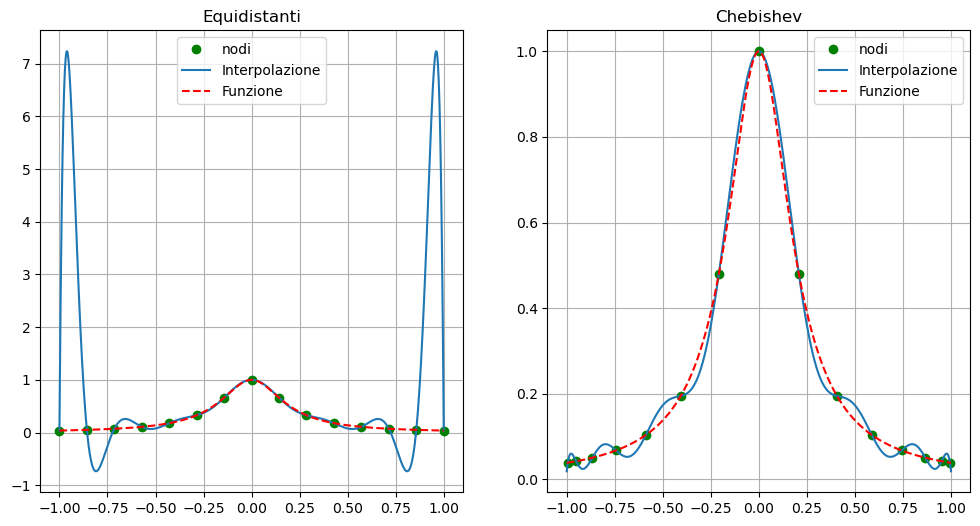

In [20]:
def equidistanti(a, b, n):
    return np.linspace(a,b,n+1)

def chebishev(a, b, n):
    nodi = np.zeros(n+1)
    for i in range(n+1):
        nodi[i] = (a+b)/2 + (b-a)/2*np.cos(((2*i+1)*np.pi)/(2*(n+1)))
    return nodi


#f, (a,b)= lambda x : np.sin(x) - 2*np.sin(2*x), (-np.pi, np.pi)
#f, (a,b)= lambda x : np.sinh(x), (-2, 2)
#f, (a,b)= lambda x : np.abs(x), (-1, 1)
f, (a,b)= lambda x : 1/(1+25*x**2), (-1, 1)

n_values = range(3, 15, 1)
error_EQ = []
error_CHB = []

for n in n_values:

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    x_EQ = equidistanti(a, b, n)
    y_EQ = f(x_EQ)
    x_CHB = chebishev(a, b, n)
    y_CHB = f(x_CHB)

    xx = np.linspace(a, b, 1000)
    yy = f(xx)

    yy_EQ = sf.InterpL(x_EQ, y_EQ, xx)
    yy_CHB = sf.InterpL(x_CHB, y_CHB, xx)


    # Calcolo l'errore
    r_EQ = np.abs(yy - yy_EQ)  # Errore per nodi equidistanti
    r_CHB = np.abs(yy - yy_CHB)  # Errore per nodi di Chebyshev

    # Norma infinito dell'errore (errore massimo)
    error_EQ.append(np.max(r_EQ))
    error_CHB.append(np.max(r_CHB))

    ax[0].set_title('Equidistanti')
    ax[0].plot(x_EQ, y_EQ, 'go', label = 'nodi')
    ax[0].plot(xx, yy_EQ, label = 'Interpolazione')
    ax[0].grid(True)
    ax[0].plot(xx, yy, 'r--', label='Funzione')
    ax[0].legend()

    ax[1].set_title('Chebishev')
    ax[1].plot(x_CHB, y_CHB, 'go',label = 'nodi')
    ax[1].plot(xx, yy_CHB,label = 'Interpolazione')
    ax[1].grid(True)
    ax[1].plot(xx, yy, 'r--',label='Funzione')
    ax[1].legend()

for i in n_values:
    print(f'n = {i}, errore_eq = {error_EQ[i-3]}, errore_cheb = {error_CHB[i-3]}')


## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

Lebesgue constants for equidistant nodes varying n:
 [3.10493825e+00 2.98943063e+01 5.08711306e+02 1.07596490e+04]
Lebesgue constants for Chebyshev nodes varying n:
 [2.10439768 2.48943038 2.72777794 2.9008249 ]


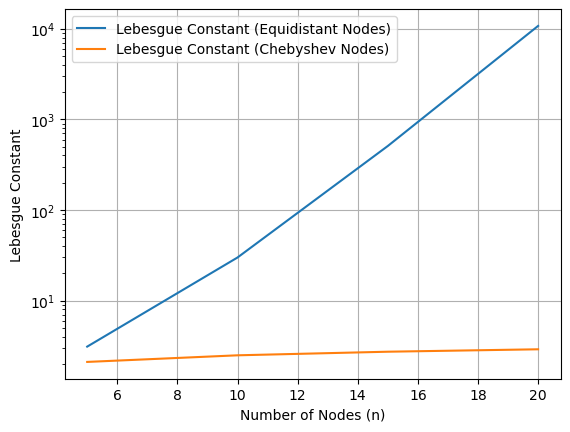

In [21]:
import numpy as np
import matplotlib.pyplot as plt



# Define the range of n values
n_values = np.arange(5, 21, 5)
# Initialize arrays to store Lebesgue constants for equidistant and Chebyshev nodes
lebesgue_constants_equidistant = np.zeros(len(n_values))
lebesgue_constants_chebyshev = np.zeros(len(n_values))

# Define the x-values for evaluation
xx = np.linspace(-1, 1, 200)

for i, n in enumerate(n_values):
    # Generate equidistant and Chebyshev nodes
    equidistant_nodes = np.linspace(-1, 1, n + 1)
    chebyshev_nodes = np.array(chebishev(-1, 1, n))
    
    # Initialize arrays to accumulate values for Lebesgue constants
    lebesgue_equidistant = np.zeros(200)
    lebesgue_chebyshev = np.zeros(200)
    
    for l in range(n + 1):
        # Compute the Lagrange polynomial for equidistant nodes
        lagrange_poly_equidistant = sf.plagr(equidistant_nodes, l)
        lebesgue_equidistant += np.abs(np.polyval(lagrange_poly_equidistant, xx))
        
        # Compute the Lagrange polynomial for Chebyshev nodes
        lagrange_poly_chebyshev = sf.plagr(chebyshev_nodes, l)
        lebesgue_chebyshev += np.abs(np.polyval(lagrange_poly_chebyshev, xx))
    
    # Calculate the maximum Lebesgue constant
    lebesgue_constants_equidistant[i] = np.max(lebesgue_equidistant)
    lebesgue_constants_chebyshev[i] = np.max(lebesgue_chebyshev)

# Print results
print('Lebesgue constants for equidistant nodes varying n:\n', lebesgue_constants_equidistant)
print('Lebesgue constants for Chebyshev nodes varying n:\n', lebesgue_constants_chebyshev)

# Plot results
plt.semilogy(n_values, lebesgue_constants_equidistant, label='Lebesgue Constant (Equidistant Nodes)')
plt.semilogy(n_values, lebesgue_constants_chebyshev, label='Lebesgue Constant (Chebyshev Nodes)')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Lebesgue Constant')
plt.legend()
plt.grid(True)
plt.show()


## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


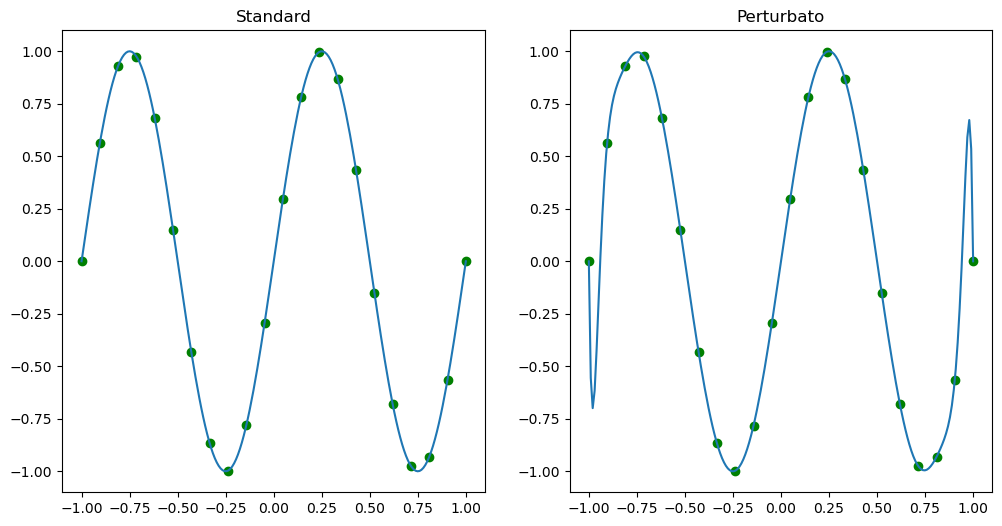

In [42]:
x = np.linspace(-1, 1, 22)
f = lambda x : np.sin(2*np.pi*x)
y = f(x)

p = 0.0002*np.random.random(22,)

ypert = y.copy() + p

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

yy = sf.InterpL(x, y, xx)
yy_pert = sf.InterpL(x, ypert, xx)

ax[0].set_title('Standard')
ax[0].plot(x, y, 'go')
ax[0].plot(xx, yy)


ax[1].set_title('Perturbato')
ax[1].plot(x, ypert, 'go')
ax[1].plot(xx, yy_pert)